In [1]:
import os
import re
import nltk
from nltk import word_tokenize , sent_tokenize , pos_tag
from tdmh import *
import requests

## create subdirectories in Corpus

if not os.path.exists('Corpus'):
    os.mkdir('Corpus')
    
path1 = os.path.join('Corpus' , 'Austen')
if not os.path.exists( path1 ):
    os.mkdir( path1 )  
    
path2 = os.path.join('Corpus' , 'Scott')
if not os.path.exists( path2 ):
    os.mkdir( path2 ) 

In [2]:
texts = []

# path1 = os.path.join( 'Corpus' , 'Scott' )
# path2 = os.path.join( 'Corpus' , 'Scott' )
subcorpora = ['Scott','Austen']


author_dir = dict()

for dir in subcorpora:
    path = os.path.join( 'Corpus' , dir )
    for file in os.listdir(path):
        if re.search( r'txt$' , file ):
            path = os.path.join( 'Corpus' , dir , file )
            author_dir[path] = dir
            texts.append(path)

In [3]:
def get_title(path):
    title = os.path.basename(path)
    if re.search( r'txt$' , title ):
        # Remove txt extension
        title = title[ :title.index('.txt') ]
        # remove commas and dots
        title = re.sub( r'[.,]' , '' , title )
    return title

In [4]:
out = open( 'data.csv' , 'w' , encoding = 'utf-8' )

pos_tags = ['JJ' , 'MD' , 'JJR' , 'JJS' , 'VBD']

## Header of the CSV file
out.write('title,author,tokens,sentences,ttr')

for t in pos_tags:
    out.write(f',{t}')
out.write('\n')

for text in texts:
    
    data = dict()
    print( f'Analysing {text} ...')
    
    ## Get the title, based on the filename
    title = get_title( text )
    
    ## read the full text
    fh = open( text, encoding = 'utf-8')
    full_text = fh.read()
    
    ## count the number of sentences
    sentences = sent_tokenize(full_text)
    data['nr_sentences'] = len(sentences)
    
    # dictionary to count the POS tags
    freq_pos = dict()    
    
    # variables for the calculation of type-token ratio
    ttr_cap = 3000
    freq_ttr = dict()
 
    # token count is initalised at 0
    data['nr_tokens'] = 0

    for s in sentences:
        words = word_tokenize(s)
        words = remove_punctuation(words)
        
        tags = pos_tag(words)
        # Each tag consists of two values: 
        # [0]: the word and [1] the POS tag
        for word_tag in tags:
            word = word_tag[0]
            tag = word_tag[1]
            
            # count the tokens
            data['nr_tokens'] += 1
            
            # place tokens in dictionary freq_ttr
            # only if the word count is less than ttr_cap
            # The nr of items in the dictionary eventually equals the nr of types
            if data['nr_tokens'] <= ttr_cap:
                freq_ttr[ word ] = freq_ttr.get( word , 0 ) + 1
                
            ## Count frequencies of all the POS tags
            freq_pos[ tag ] = freq_pos.get( tag ,0) +1

    for t in pos_tags:
        data[t] = freq_pos.get(t,0)
                
    # Calculate TTR: number of items in freq_ttr dictyionary
    # divided by ttr_cap
    data['ttr'] = len( freq_ttr ) / ttr_cap
    
    # write the results to a CSV file    
    out.write( f"{title},{author_dir[text]},{data['nr_tokens']},{data['nr_sentences']},{data['ttr']}" )
    for t in pos_tags:
        out.write( f",{data[t] / data['nr_tokens'] }"  )
    out.write('\n')
    
out.close()
print('Done!')


Analysing Corpus/Scott/Ivanhoe.txt ...
Analysing Corpus/Scott/Rob Roy.txt ...
Analysing Corpus/Scott/The Antiquary.txt ...
Analysing Corpus/Scott/The Talisman.txt ...
Analysing Corpus/Scott/TheLadyoftheLake.txt ...
Analysing Corpus/Scott/Waverley.txt ...
Analysing Corpus/Austen/Emma.txt ...
Analysing Corpus/Austen/Mansfield Park.txt ...
Analysing Corpus/Austen/Northanger Abbey.txt ...
Analysing Corpus/Austen/Persuasion.txt ...
Analysing Corpus/Austen/PrideandPrejuidice.txt ...
Analysing Corpus/Austen/SenseandSensibility.txt ...
Done!


In [5]:
import os
import re
import nltk
from nltk import word_tokenize , sent_tokenize , pos_tag
from tdmh import *
import requests

In [6]:
texts = []

# path1 = os.path.join( 'Corpus' , 'Scott' )
# path2 = os.path.join( 'Corpus' , 'Scott' )
subcorpora = ['Scott','Austen']


author_dir = dict()

for dir in subcorpora:
    path = os.path.join( 'Corpus' , dir )
    for file in os.listdir(path):
        if re.search( r'txt$' , file ):
            path = os.path.join( 'Corpus' , dir , file )
            author_dir[path] = dir
            texts.append(path)

In [7]:
import pandas as pd

data = pd.read_csv( 'data.csv')

In [9]:
print(data['ttr'].max() )
## max() identifies the highest number within the column that is mentioned within the square brackets.

print( data['JJ'].max() )
# min() identifies the lowest number

print( data['MD'].mean() )
# mean() calculates the mean of all the values in a specific column

print( data['JJR'].sum() )
## sum() performs an addition of all the numbers in a column

0.4543333333333333
0.0687365824314703
0.019208211140838215
0.03522301080088899


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

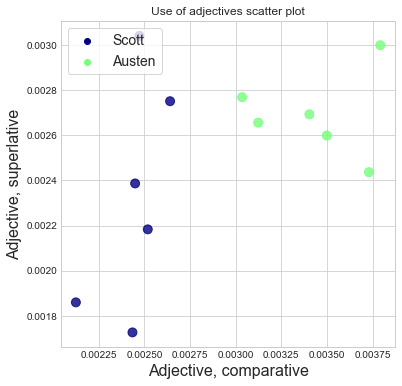

In [60]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

fig = plt.figure( figsize = ( 6,6 ))
ax = plt.axes()


ax.scatter( data['JJR'] , data['JJS'] , alpha=0.8,  s=80 , c = colours)

ax.set_xlabel('Adjective, comparative' , fontsize = 16 )
ax.set_ylabel('Adjective, superlative' , fontsize = 16 )

plt.title('Use of adjectives scatter plot')

for item in legendDict:
    plt.scatter( [], [], c = item , label = legendDict[item] )

plt.legend(loc=2 , frameon=True ,  prop={'size': 14} )

plt.show()

In [57]:
colours = []
legendDict = dict()

for index , row in data.iterrows():

    if row["author"] == 'Austen':
        colours.append( '#76FF7b' )
        legendDict[ colours[index] ] = row["author"]
    elif row["author"] == 'Scott':
        colours.append( '#000080' )
        legendDict[ colours[index] ] = row["author"]

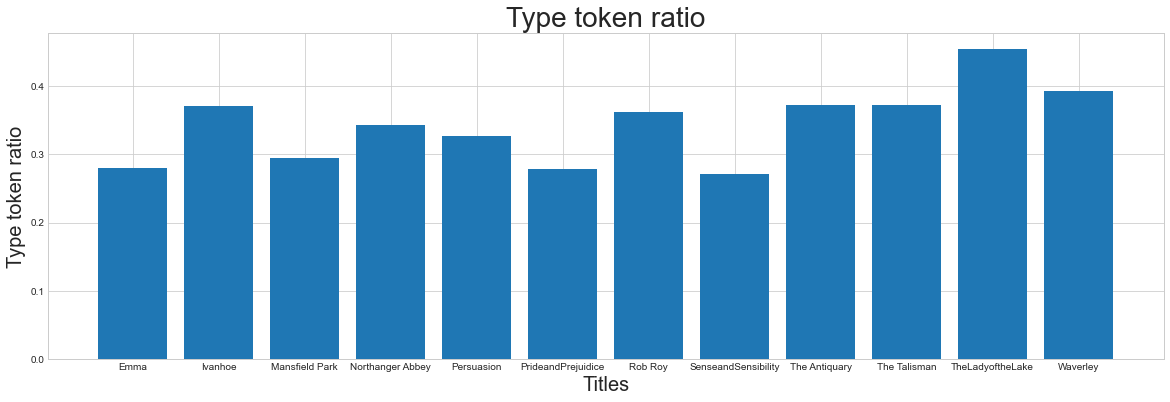

In [86]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

mean_ttr = data.groupby( 'title' )['ttr'].mean()

x_axis = mean_ttr.index.tolist()
y_axis = mean_ttr.tolist()

fig = plt.figure( figsize=(20,6) )
ax = plt.axes()

ax.bar( x_axis , y_axis )

ax.set_xlabel('Titles' , fontsize= 20)
ax.set_ylabel('Type token ratio' , fontsize = 20 )
ax.set_title( 'Type token ratio' , fontsize=28 )

plt.show()

In [61]:
#sentiment analysis
import sys
!pip install vaderSentiment

In [62]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
#from nltk.sentiment.vader import SentimentIntensityAnalyzer

ana = SentimentIntensityAnalyzer()

In [77]:
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from os.path import join
from tdmh import*

import os

dir = 'Corpus'
for fileName in os.listdir( dir ):
    print( fileName )
    
novel = open( join('Corpus', 'Austen', 'Emma.txt') , encoding = 'utf-8')
full_text = novel.read()

sentences = sent_tokenize(full_text)
print(len(sentences))

words = word_tokenize(full_text)
print(len(words))

.DS_Store
Austen
Scott
5964
189829


In [80]:
positive_words = []
negative_words = []

for word in words:
    scores = ana.polarity_scores(word)
    if scores["pos"] > 0.75:
        positive_words.append(word)
    elif scores["neg"] > 0.75:
        negative_words.append(word)
        
#print( positive_words) 
#print( negative_words) 

print( len(positive_words) )
print( len(negative_words) )


9527
4891


In [84]:
#Comparing texts
from nltk import sent_tokenize
from os.path import join

def average_score(file):
    all_scores = []
    file = open( file , encoding = 'utf-8' )
    full_text = file.read()
    sentences = sent_tokenize( full_text )
    for s in sentences:
        scores = ana.polarity_scores(s)
        all_scores.append( scores["pos"] )
    return sum(all_scores) / len(all_scores)
        

path = join( 'Corpus', 'Austen', 'Emma.txt' )
print( 'Average sentiment score for "Emma":' )
print( f'{ round( average_score(path),3) }' )

path = join( 'Corpus' , 'Austen' , 'PrideandPrejuidice.txt' )
print( 'Average sentiment score for "Pride and Prejudice":' )
print( f'{ round( average_score(path),3) }' )

Average sentiment score for "Emma":
0.129
Average sentiment score for "Pride and Prejudice":
0.124
